# 단변량 데이터 탐색

In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv("../BigData_data/Ex_CEOSalary.csv", encoding = 'utf-8')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   salary    209 non-null    int64  
 1   sales     209 non-null    float64
 2   roe       209 non-null    float64
 3   industry  209 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 6.7 KB


In [2]:
data.head()

,salary,sales,roe,industry
0,1095,27595.000000,14.1,1
1,1001,9958.000000,10.9,1
2,1122,6125.899902,23.5,1
3,578,16246.000000,5.9,1
4,1368,21783.199219,13.8,1


In [3]:
# 범주형 자료 탐색
data['industry'].value_counts()

1    72
3    60
2    46
4    31
Name: industry, dtype: int64

In [4]:
# 범주형 자료 이름 변환 : replace
data['industry'] = data['industry'].replace([1,2,3,4], ["Service", "IT", "Finance", "Others"])
data['industry'].value_counts()

Service    72
Finance    60
IT         46
Others     31
Name: industry, dtype: int64

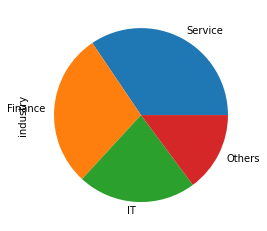

In [5]:
# 시각화 : value_counts()
import matplotlib.pyplot as plt
import matplotlib as mpl
data['industry'].value_counts().plot(kind='pie');

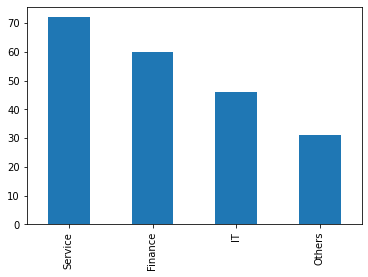

In [6]:
data['industry'].value_counts().plot(kind='bar');

In [7]:
# 연속형 자료 탐색
data.describe()   # 기술통계 확인 : describe()

,salary,sales,roe
count,209.000000,209.000000,209.000000
mean,1281.119617,6923.793282,17.184211
std,1372.345308,10633.271088,8.518509
min,223.000000,175.199997,0.500000
25%,736.000000,2210.300049,12.400000
50%,1039.000000,3705.199951,15.500000
75%,1407.000000,7177.000000,20.000000
max,14822.000000,97649.898438,56.299999


In [8]:
# 왜도 확인
data.skew()

# salary, sales > 2 이므로 우측 편포 (평균 > 중앙값 > 최빈값)
# 왜도 = 0 일 경우 좌우대칭

salary    6.904577
sales     5.035336
roe       1.572126
dtype: float64

In [9]:
# 첨도 확인
data.kurtosis()

# 첨도 = 0 일 경우 정규분포의 높이와 동일
# 첨도 > 0 일 경우 중심에 자료 집중

salary    58.971229
sales     33.115193
roe        3.797366
dtype: float64

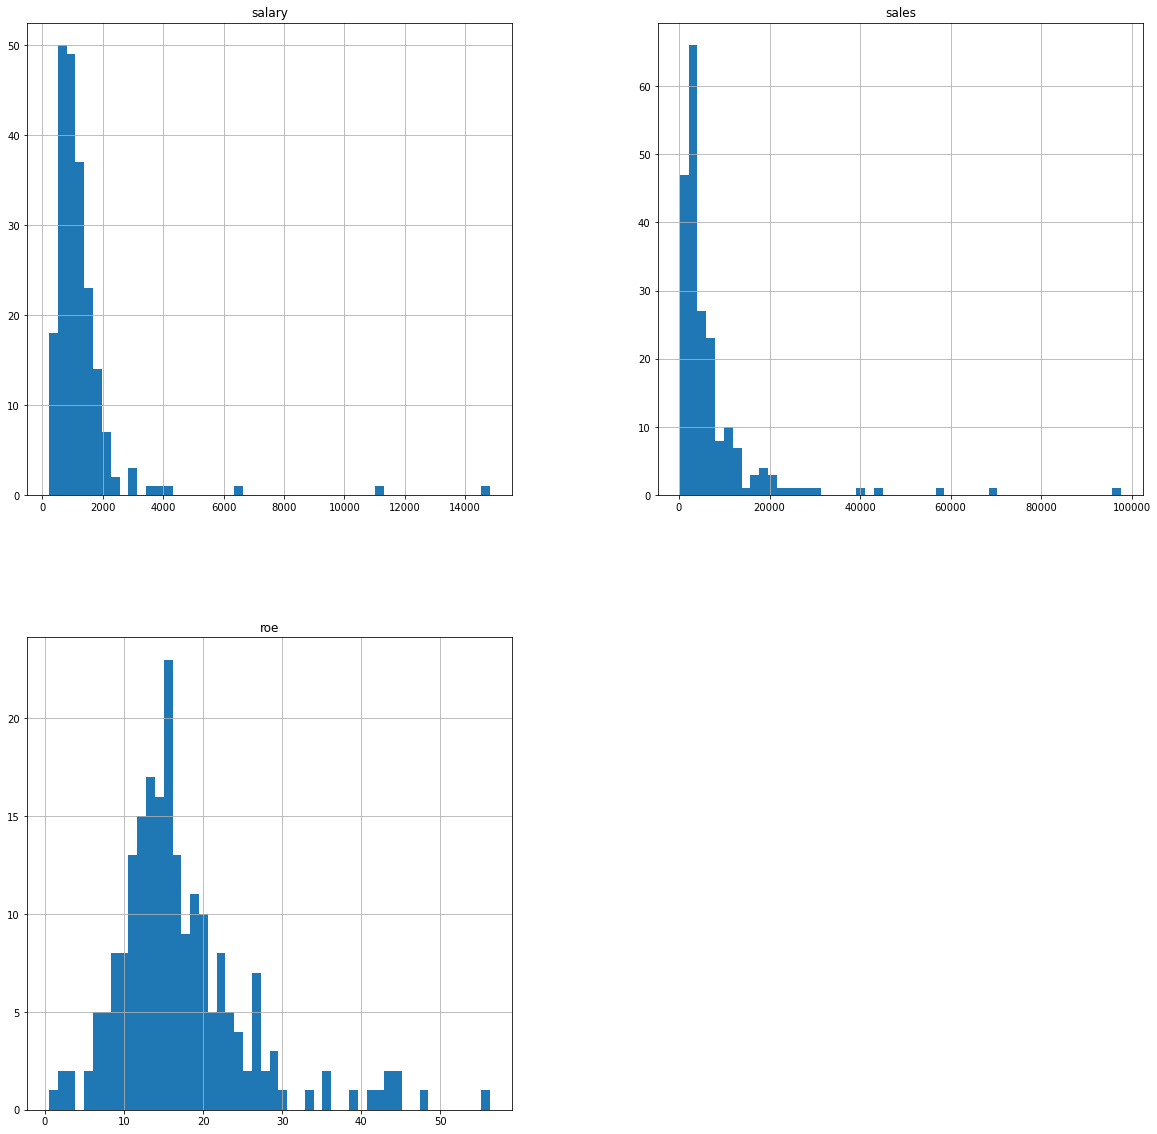

In [10]:
# Histogram 확인 (전체)
data.hist(bins=50, figsize=(20,20));

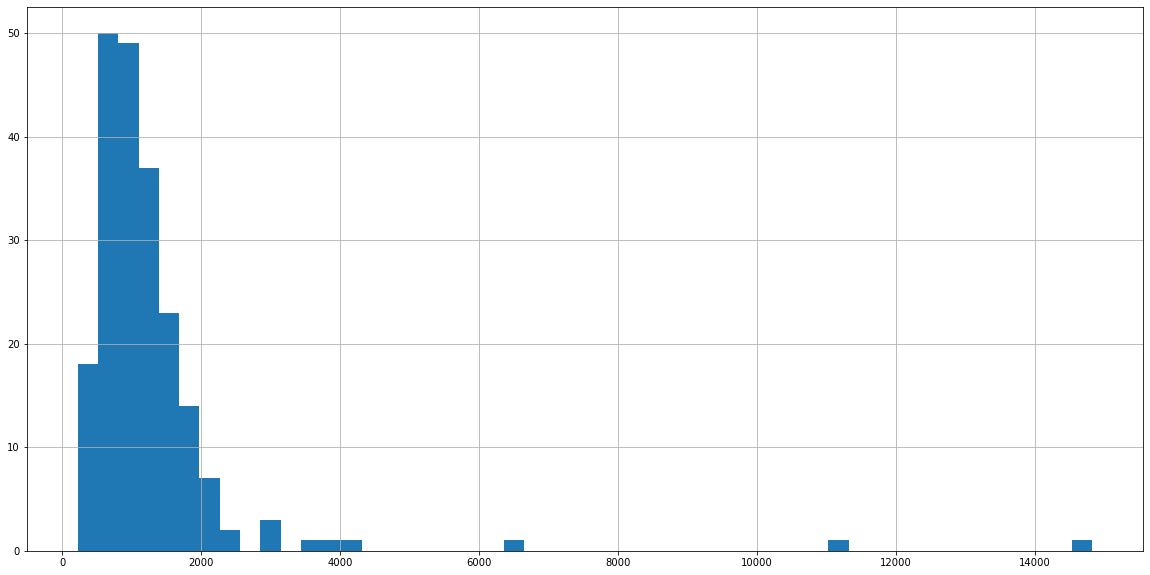

In [11]:
# Histogram 확인 (개별 : Salary)
data['salary'].hist(bins=50, figsize=(20,10));

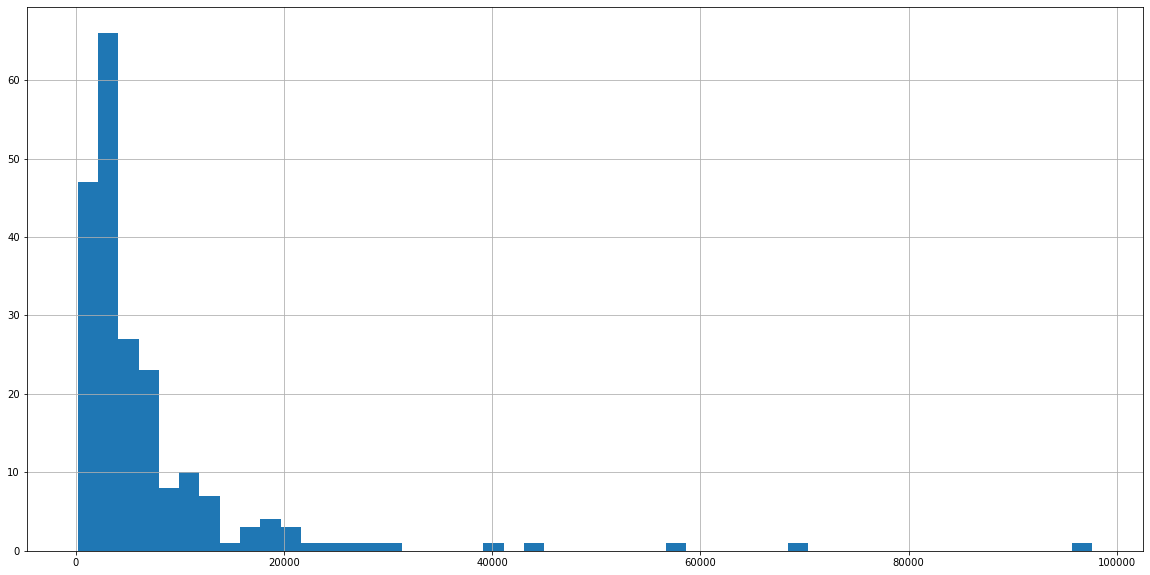

In [12]:
# Histogram 확인 (개별 : Sales)
data['sales'].hist(bins=50, figsize=(20,10));

# 이변량 데이터 검색

In [13]:
# 상관계수 파악
data.corr()

# 이상값의 존재로 인해 상관관계가 약한 수준

,salary,sales,roe
salary,1.000000,0.119869,0.114842
sales,0.119869,1.000000,-0.055386
roe,0.114842,-0.055386,1.000000


In [14]:
# 상관계수 method = spearman, pearson, kendall
print(data.corr(method='pearson'))
print('\n', data.corr(method='spearman'))
print('\n', data.corr(method='kendall'))

          salary     sales       roe
salary  1.000000  0.119869  0.114842
sales   0.119869  1.000000 -0.055386
roe     0.114842 -0.055386  1.000000

           salary     sales       roe
salary  1.000000  0.528016  0.205984
sales   0.528016  1.000000 -0.170548
roe     0.205984 -0.170548  1.000000

           salary     sales       roe
salary  1.000000  0.363921  0.143672
sales   0.363921  1.000000 -0.123844
roe     0.143672 -0.123844  1.000000


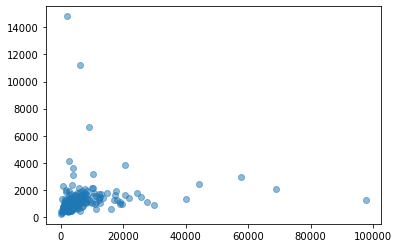

In [15]:
# 산점도 확인
plt.scatter(data['sales'], data['salary'], alpha=0.5)
plt.show();

# 이상값 존재로 인한 그래프 왜곡

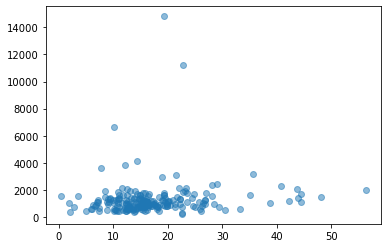

In [16]:
plt.scatter(data['roe'], data['salary'], alpha=0.5)
plt.show();

In [17]:
# 산업 범주별 기술통계 파악 : groupby('기준 column')
data.groupby('industry')[['salary']].describe()

# Finance의 평균 연봉이 가장 높고, Others의 평균 연봉이 가장 낮음을 확인 가능

salary                                                            \
          count         mean          std    min     25%     50%      75%   
industry                                                                    
Finance    60.0  1722.416667  2242.687041  223.0  911.00  1246.0  1643.75   
IT         46.0  1344.913043  1002.813128  441.0  884.00  1119.5  1406.00   
Others     31.0   627.870968   175.264323  333.0  501.50   607.0   726.00   
Service    72.0  1153.875000   563.472032  256.0  811.25  1064.0  1348.50   

                   
              max  
industry           
Finance   14822.0  
IT         6640.0  
Others     1100.0  
Service    3844.0

# 이상값 처리

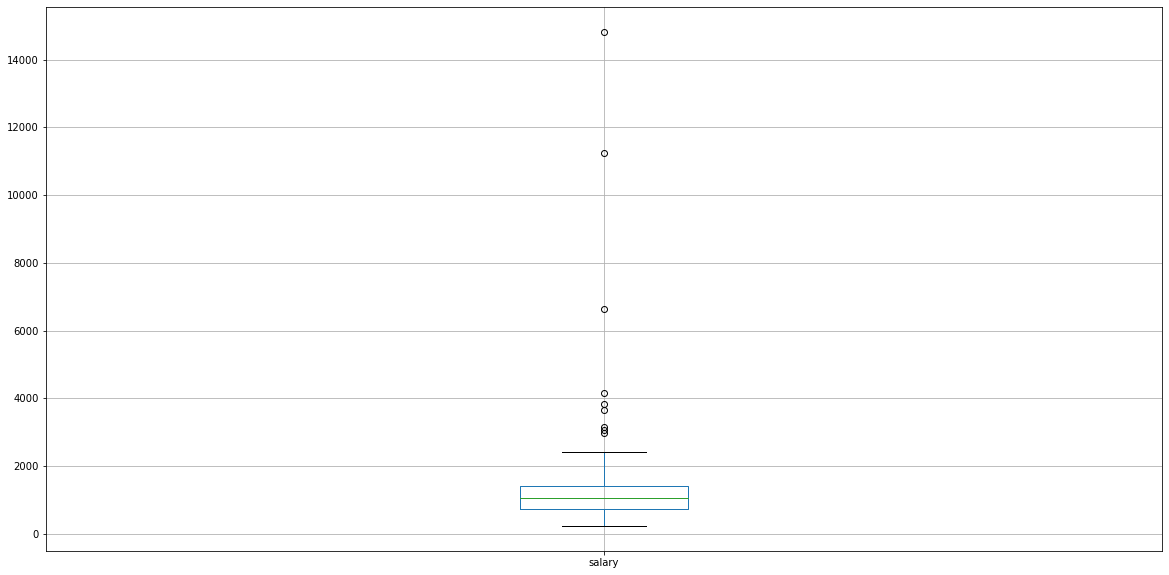

In [18]:
# 박스 플롯 활용
data.boxplot(column='salary', return_type='both', figsize=(20,10));

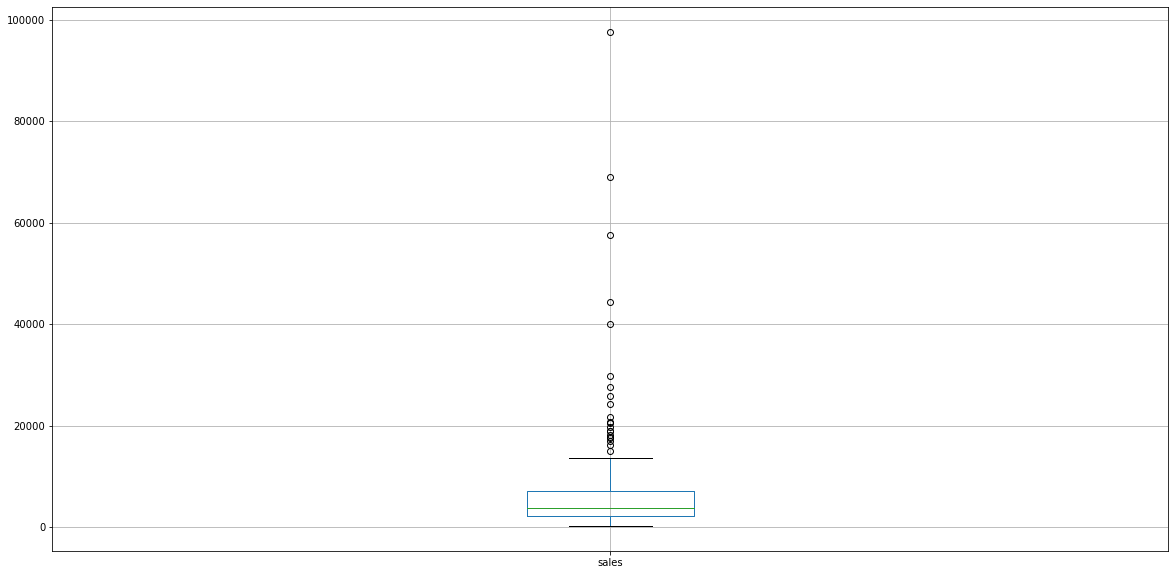

In [19]:
data.boxplot(column='sales', return_type='both', figsize=(20,10));

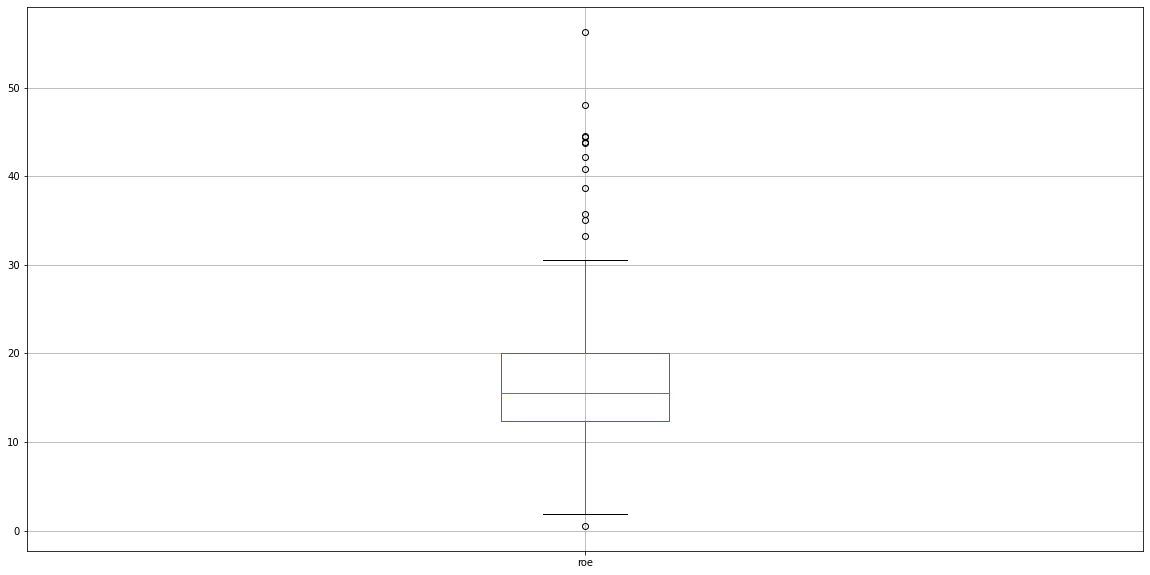

In [20]:
data.boxplot(column='roe', return_type='both', figsize=(20,10));

## IQR 활용 이상값 처리

In [21]:
# Salary 변수 이상값을 IQR을 활용하여 처리
# IQR = (Q3 - Q1)
# IQR을 활용한 이상값 식별 : Q3 + IQR * 1.5 보다 크고 Q1 - IQR * 1.5 보다 작은 값이 이상값

Q1_salary = data['salary'].quantile(q=0.25)
Q3_salary = data['salary'].quantile(q=0.75)
IQR_salary = Q3_salary - Q1_salary
IQR_salary

671.0

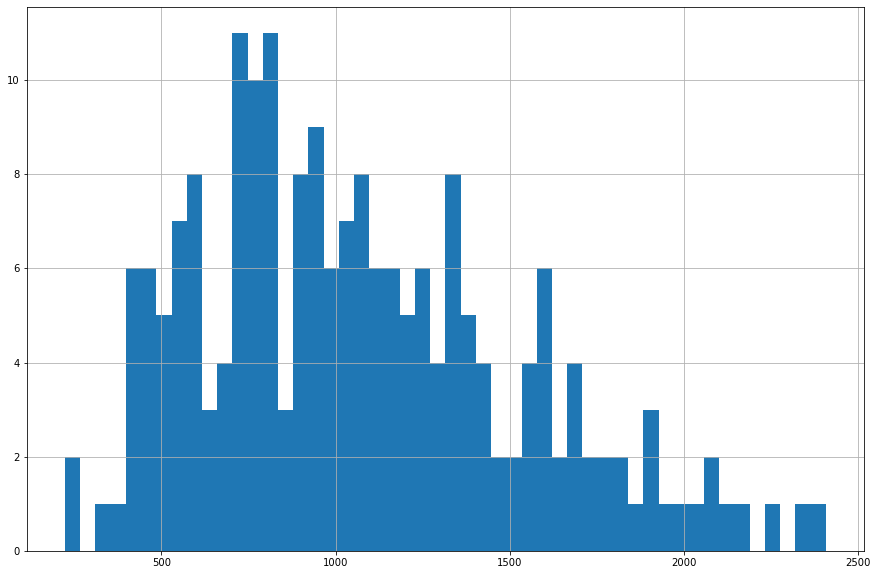

In [22]:
data_IQR = data[(data['salary']<Q3_salary + IQR_salary * 1.5) &
                (data['salary']>Q1_salary - IQR_salary * 1.5)]
data_IQR['salary'].hist(bins=50, figsize=(15,10));

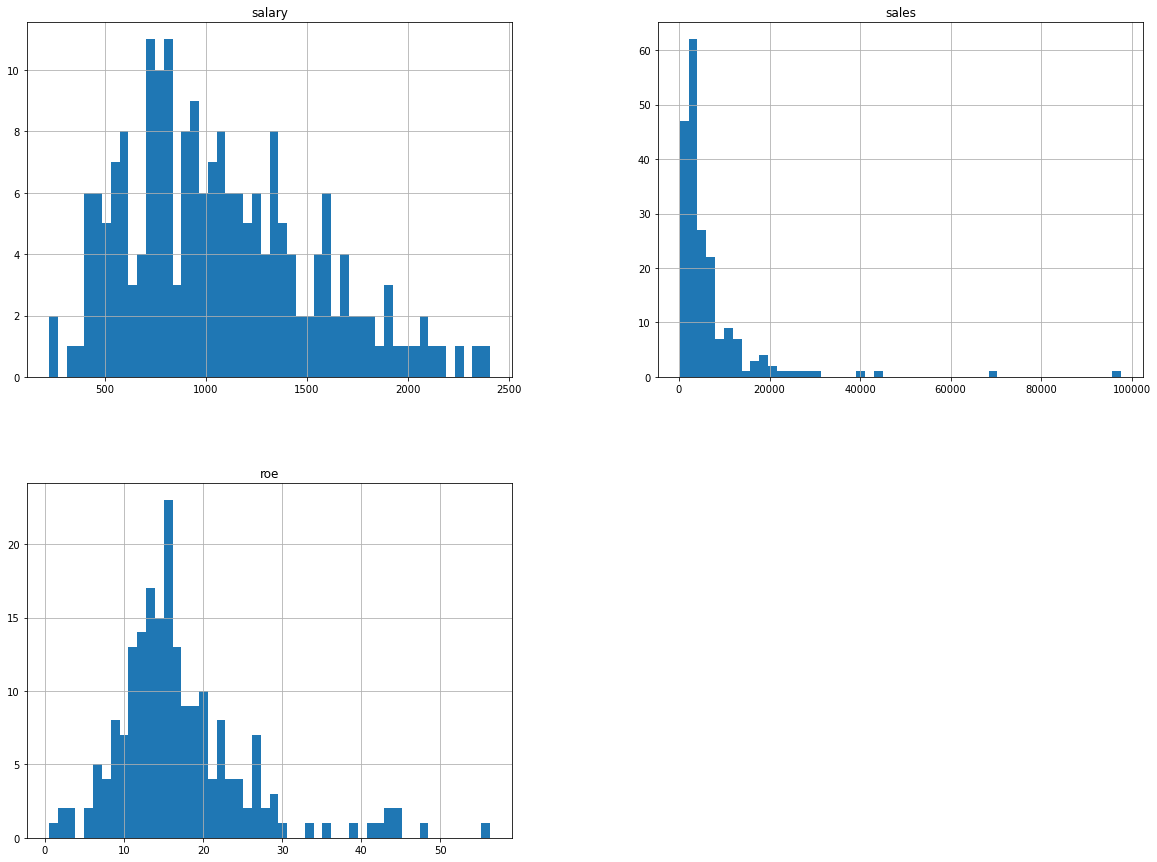

In [23]:
data_IQR.hist(bins=50, figsize=(20,15));

In [24]:
# data_IQR의 상관계수 확인
data_IQR.corr()

,salary,sales,roe
salary,1.000000,0.335446,0.289704
sales,0.335446,1.000000,-0.065034
roe,0.289704,-0.065034,1.000000


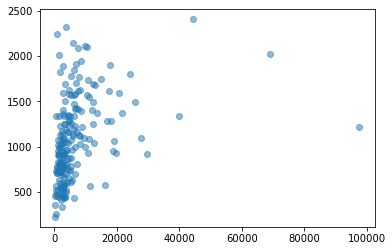

In [25]:
plt.scatter(data_IQR['sales'], data_IQR['salary'], alpha=0.5);
plt.show()

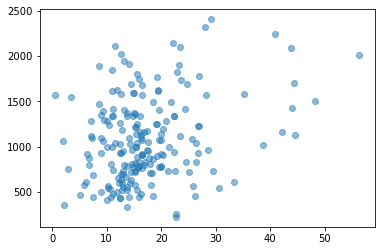

In [26]:
plt.scatter(data_IQR['roe'], data_IQR['salary'], alpha=0.5);
plt.show()

In [27]:
# Sales 변수 이상값 처리
Q1_sales = data['sales'].quantile(q=0.25)
Q3_sales = data['sales'].quantile(q=0.75)
IQR_sales = Q3_sales - Q1_sales
IQR_sales

4966.6999511718695

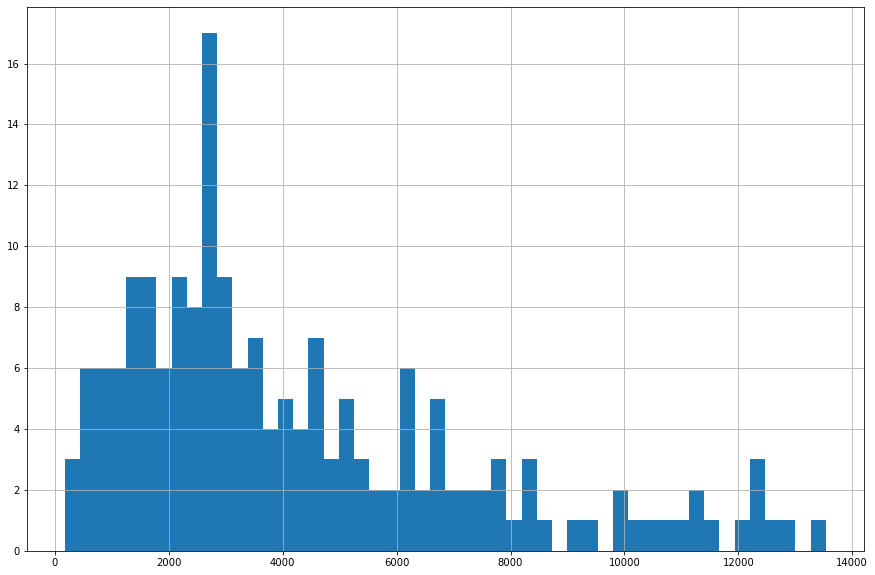

In [30]:
data_IQR = data[(data['sales']<Q3_sales + IQR_sales * 1.5) &
                (data['sales']>Q1_sales - IQR_sales * 1.5) &
                (data['salary']<Q3_salary + IQR_salary * 1.5) &
                (data['salary']>Q1_salary - IQR_salary * 1.5)]
data_IQR['sales'].hist(bins=50, figsize=(15,10));

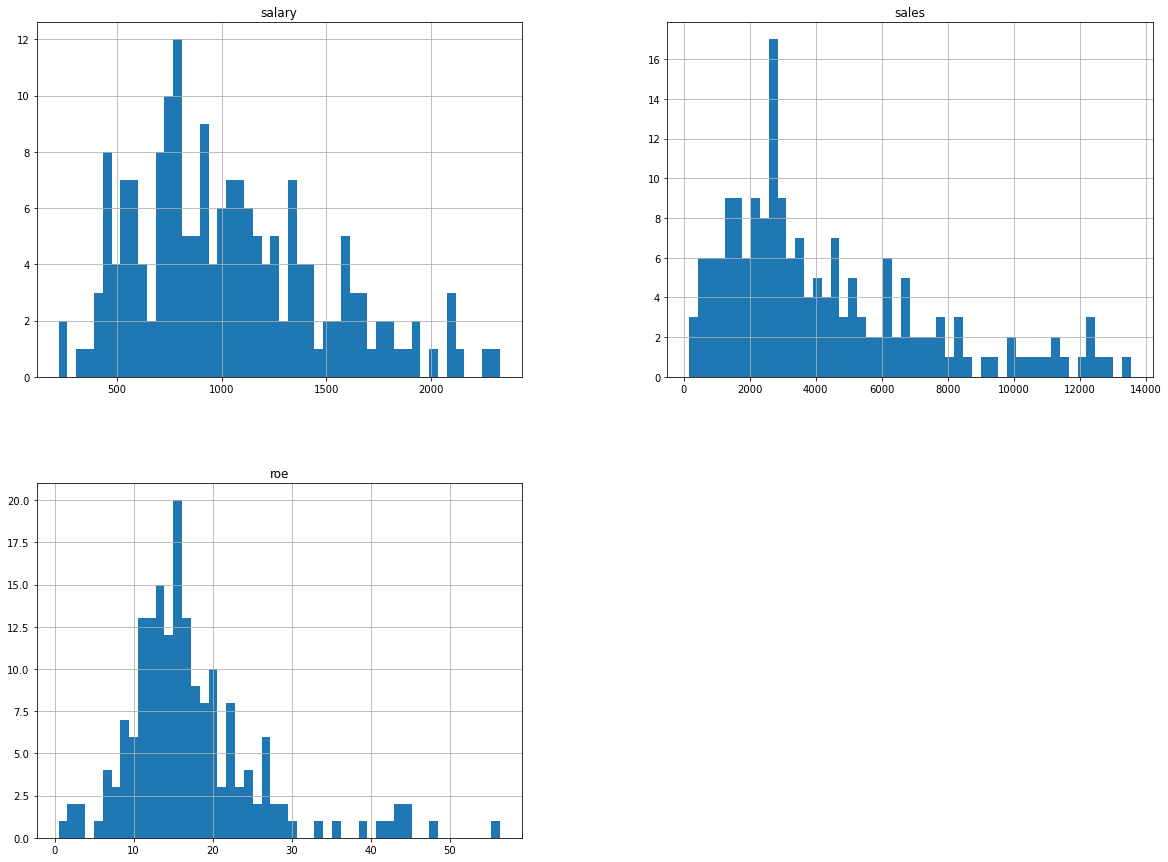

In [31]:
# 이상값 처리 후 히스토그램 확인
data_IQR.hist(bins=50, figsize=(20,15));

In [32]:
# 상관계수 확인
data_IQR.corr()

,salary,sales,roe
salary,1.000000,0.471278,0.299153
sales,0.471278,1.000000,-0.076046
roe,0.299153,-0.076046,1.000000


# 변수변환

## Log 변환

In [33]:
# Numpy의 Log 함수를 이용하여 변환
data['log_salary'] = np.log(data['salary'])
data['log_sales']=np.log(data['sales'])
data['log_roe']=np.log(data['roe'])
data.head()

,salary,sales,roe,industry,log_salary,log_sales,log_roe
0,1095,27595.000000,14.1,Service,6.998510,10.225390,2.646175
1,1001,9958.000000,10.9,Service,6.908755,9.206132,2.388763
2,1122,6125.899902,23.5,Service,7.022868,8.720281,3.157000
3,578,16246.000000,5.9,Service,6.359574,9.695602,1.774952
4,1368,21783.199219,13.8,Service,7.221105,9.988894,2.624669


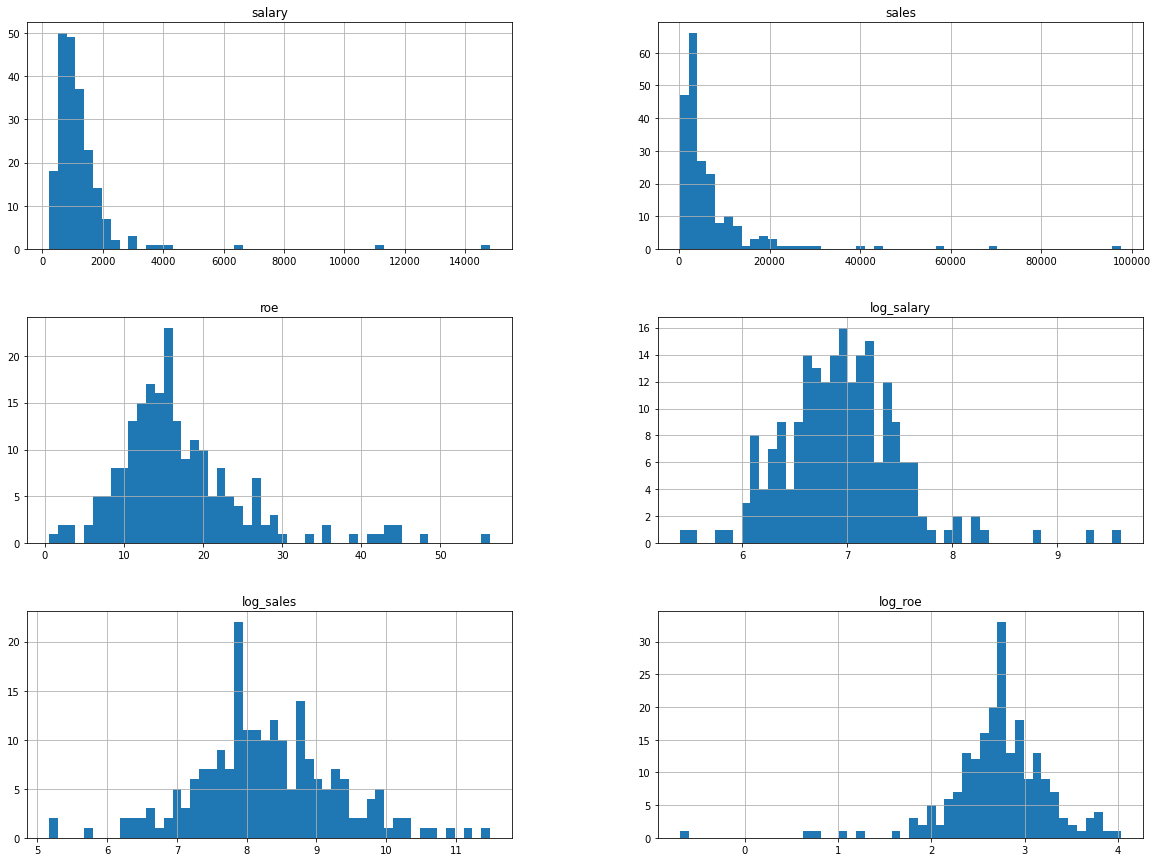

In [34]:
data.hist(bins=50, figsize=(20,15));

# 히스토그램 상으로 이상값의 영향이 제거됐음을 확인 가능

In [35]:
# 상관계수 확인
data.corr()

# Log 변환 후의 상관계수가 높아진 것으로 왜곡된 관계가 해결됨을 확인 가능

,salary,sales,roe,log_salary,log_sales,log_roe
salary,1.000000,0.119869,0.114842,0.794208,0.194092,0.101526
sales,0.119869,1.000000,-0.055386,0.281286,0.742921,-0.041004
roe,0.114842,-0.055386,1.000000,0.208499,-0.122553,0.873419
log_salary,0.794208,0.281286,0.208499,1.000000,0.459148,0.163548
log_sales,0.194092,0.742921,-0.122553,0.459148,1.000000,-0.120642
log_roe,0.101526,-0.041004,0.873419,0.163548,-0.120642,1.000000


## 제곱근 변환

In [36]:
data['sqrt_salary']=np.sqrt(data['salary'])
data['sqrt_sales']=np.sqrt(data['sales'])
data['sqrt_roe']=np.sqrt(data['roe'])
data.head()

,salary,sales,roe,industry,log_salary,log_sales,log_roe,sqrt_salary,sqrt_sales,sqrt_roe
0,1095,27595.000000,14.1,Service,6.998510,10.225390,2.646175,33.090784,166.117428,3.754997
1,1001,9958.000000,10.9,Service,6.908755,9.206132,2.388763,31.638584,99.789779,3.301515
2,1122,6125.899902,23.5,Service,7.022868,8.720281,3.157000,33.496268,78.268128,4.847680
3,578,16246.000000,5.9,Service,6.359574,9.695602,1.774952,24.041631,127.459798,2.428992
4,1368,21783.199219,13.8,Service,7.221105,9.988894,2.624669,36.986484,147.591325,3.714835


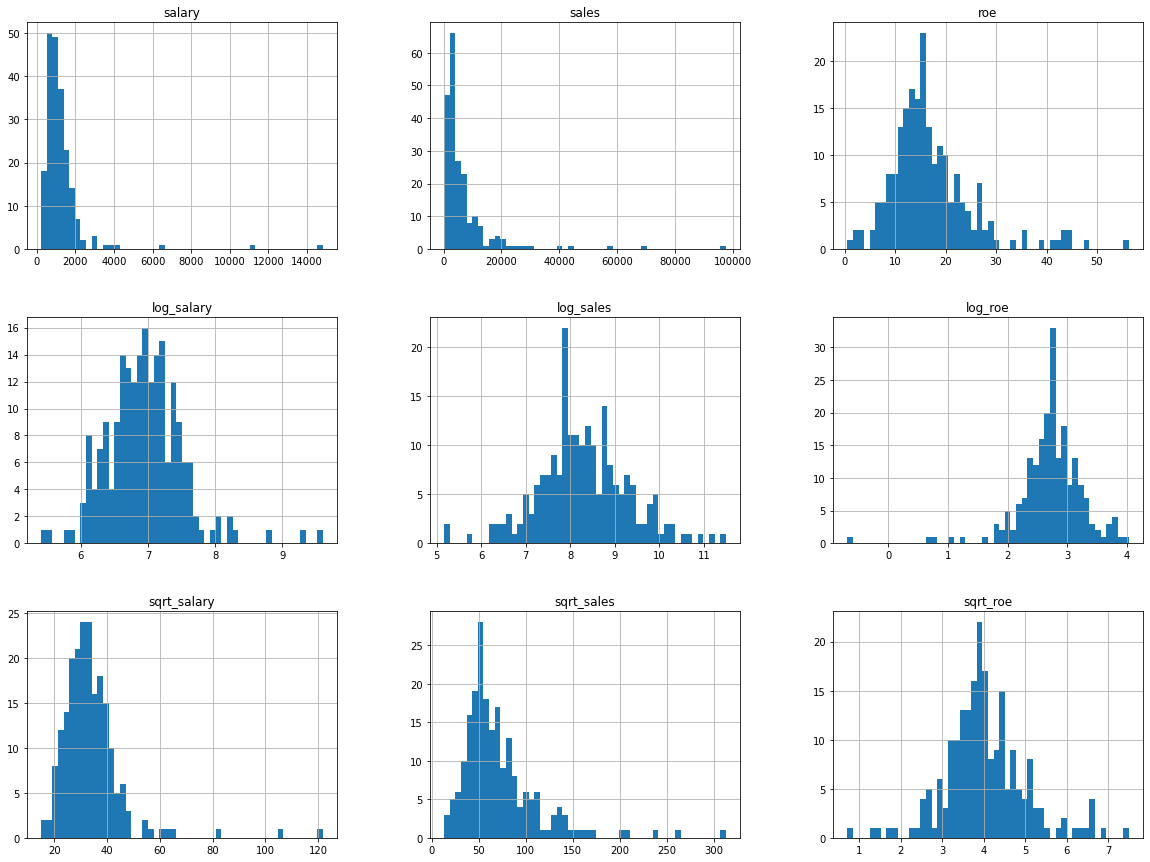

In [37]:
data.hist(bins=50, figsize=(20,15));

# 정규분포에 근접해짐을 확인 가능

In [38]:
# 상관계수 확인

data.corr()

,salary,sales,roe,log_salary,log_sales,log_roe,sqrt_salary,sqrt_sales,sqrt_roe
salary,1.000000,0.119869,0.114842,0.794208,0.194092,0.101526,0.945732,0.164340,0.115219
sales,0.119869,1.000000,-0.055386,0.281286,0.742921,-0.041004,0.215716,0.936282,-0.050538
roe,0.114842,-0.055386,1.000000,0.208499,-0.122553,0.873419,0.172327,-0.087687,0.977012
log_salary,0.794208,0.281286,0.208499,1.000000,0.459148,0.163548,0.946014,0.386456,0.197914
log_sales,0.194092,0.742921,-0.122553,0.459148,1.000000,-0.120642,0.342422,0.920797,-0.129020
log_roe,0.101526,-0.041004,0.873419,0.163548,-0.120642,1.000000,0.139470,-0.083308,0.953806
sqrt_salary,0.945732,0.215716,0.172327,0.946014,0.342422,0.139470,1.000000,0.293173,0.165932
sqrt_sales,0.164340,0.936282,-0.087687,0.386456,0.920797,-0.083308,0.293173,1.000000,-0.089501
sqrt_roe,0.115219,-0.050538,0.977012,0.197914,-0.129020,0.953806,0.165932,-0.089501,1.000000
